In [38]:
%matplotlib notebook

In [39]:
import numpy as np
import random
from scipy.optimize import minimize
import copy
import matplotlib.pyplot as plt

In [51]:
#This will be the rosenbrock function
#using a = 1 and b = 100 for this test because that is a known value minimum (1, 1) and z is 0
f = lambda x0: (1 - x0[0])**2 + (100*((x[1] - x[0]**2)**2))

#generate some random points
#This will be an array of points between [-2 and 2]
x = np.array([4*random.random() - 2, 4*random.random()-2])
copyX = copy.deepcopy(x)
print(x)
print(copyX)

x[0]+=1
print(x)
print(copyX)

x[0]-=1

print(x)

[ 1.80423713 -0.39404982]
[ 1.80423713 -0.39404982]
[ 2.80423713 -0.39404982]
[ 1.80423713 -0.39404982]
[ 1.80423713 -0.39404982]


In [41]:
#So for the gradient descent, you need to create a Hessian Matrix of the function
#This will be that hessian
#|2-400y+1200x**2     -400x|
#|                         |
#|-400x                 200|

j = 2 - (400 * x[1]) + (1200*(x[0]**2))
print(j)
k = -400 * x[0] 
l = -400 * x[0]
m = 200

H = np.array([[j, k], [l, m]])
print(H)

print()

#This will be the b vector that will finish up the line
#|-2-500x**3|
#|          |
#|400x**2   |

c = -2-500*(x[0]**3)
e = 400*(x[0]**2)

b = np.array([c, e])

print(b)

717.9525703437989
[[ 717.95257034 -261.56124229]
 [-261.56124229  200.        ]]

[-141.80097637  171.03570868]


In [42]:
r0 = b - np.matmul(H, x)

p0 = r0

print(r0)
print(p0)

[-743.91365791  443.49413951]
[-743.91365791  443.49413951]


In [52]:
#This is the loop that will try and find the minimum
print("Hello")
print(r0)
print(np.sqrt(r0[0]**2+r0[1]**2))
while np.sqrt(r0[0]**2+r0[1]**2) > 1e-40:
    alpha = (r0[0]**2 + r0[1]**2)/np.matmul(np.matmul(p0, H), p0)
    nextX = x + alpha*p0
    nextR = r0 - (alpha*np.matmul(H, p0))
    beta = (nextR[0]**2 + nextR[1]**2)/(r0[0]**2+r0[1]**2)
    nextP = nextR + beta*p0
    
    #Reassign stuff
    p0=nextP
    print(p0)
    r0=nextR
    x=nextX
    print("Iteration")
    
print(x)

Hello
[ 1.04659479e-42 -4.37205121e-43]
1.1342437891852355e-42
[ 1.80423713 -0.39404982]


In [53]:
print("b --> " + str(b))
print("Ax --> " + str(np.matmul(H, x)))

print("Optimization --> " + str(f(x)))

b --> [-141.80097637  171.03570868]
Ax --> [1398.42484835 -550.72846992]
Optimization --> 1332.4015067620373


In [45]:
print(copyX)
print(x)
res = minimize(f, copyX, method='CG', tol=1e-40, options={'disp': True})

[ 0.65390311 -0.50711361]
[0.21783637 1.1400663 ]
Optimization terminated successfully.
         Current function value: 119.380452
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [48]:
f = lambda x0: (1 - x0[0])**2 + (100*((x[1] - x[0]**2)**2))

xl = np.linspace(-6, 6, 100)
yl = np.linspace(-6, 6, 100)

xm,ym = np.meshgrid(xl,yl)
z = f([xm, ym])

levels = np.arange(np.min(z), np.max(z), 0.3)
"""plt.contour(xl,yl,z, levels=levels)
plt.contour(xl,yl,z)

plt.plot(copyX[0], copyX[0], "ro")"""

'plt.contour(xl,yl,z, levels=levels)\nplt.contour(xl,yl,z)\n\nplt.plot(copyX[0], copyX[0], "ro")'

<IPython.core.display.Javascript object>


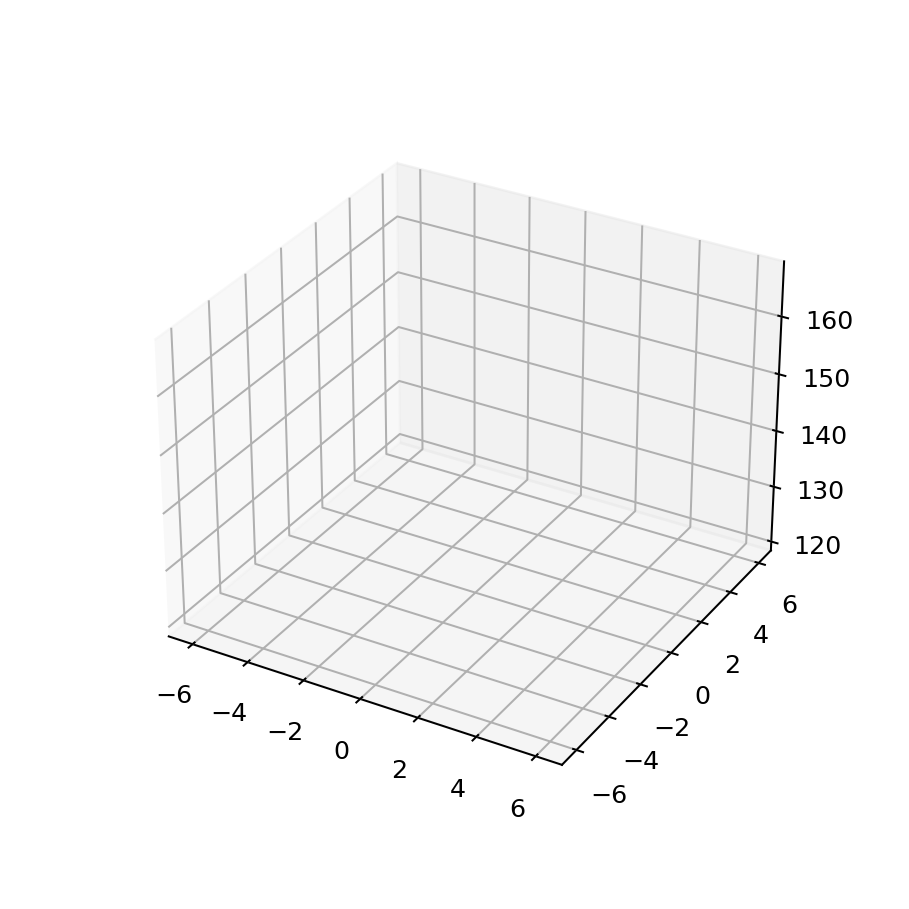

/var/folders/_k/2mty61s53qv_0k67g1cbzvn40000gn/T/ipykernel_3524/3681094648.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [49]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
ax = fig.gca(projection='3d')
ax.plot_surface(xl,yl,z, cmap='summer')
plt.show()